In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.stats import norm

In [70]:
df = pd.read_csv("data_1.csv")
df

,id,color,mass,diameter_1,diameter_2,diameter_3
0,1,1,5.760,1.65,1.62,1.66
1,2,1,5.580,1.61,1.62,1.62
2,3,1,5.353,1.60,1.62,1.62
3,4,1,5.629,1.63,1.66,1.65
4,5,1,5.170,1.61,1.58,1.61
5,6,1,5.746,1.64,1.68,1.63
6,7,1,5.127,1.58,1.60,1.59
7,8,1,4.992,1.57,1.55,1.57
8,9,1,5.705,1.65,1.64,1.62
9,10,1,5.578,1.59,1.62,1.60


Основные гистограммы для щарика с цветом 1



In [71]:
df = df.assign(vol_1 = round(math.pi*(df.diameter_1**3)/6, 3))
df = df.assign(vol_2 = round(math.pi*(df.diameter_2**3)/6, 3))
df = df.assign(vol_3 = round(math.pi*(df.diameter_3**3)/6, 3))

In [72]:
df = df.assign(vol_mean = round((df.vol_1 + df.vol_2 + df.vol_3)/3, 3))

In [73]:
df = df.assign(density = round(df.mass/df.vol_mean, 3))
df

,id,color,mass,diameter_1,diameter_2,diameter_3,vol_1,vol_2,vol_3,vol_mean,density
0,1,1,5.760,1.65,1.62,1.66,2.352,2.226,2.395,2.324,2.478
1,2,1,5.580,1.61,1.62,1.62,2.185,2.226,2.226,2.212,2.523
2,3,1,5.353,1.60,1.62,1.62,2.145,2.226,2.226,2.199,2.434
3,4,1,5.629,1.63,1.66,1.65,2.268,2.395,2.352,2.338,2.408
4,5,1,5.170,1.61,1.58,1.61,2.185,2.065,2.185,2.145,2.410
5,6,1,5.746,1.64,1.68,1.63,2.310,2.483,2.268,2.354,2.441
6,7,1,5.127,1.58,1.60,1.59,2.065,2.145,2.105,2.105,2.436
7,8,1,4.992,1.57,1.55,1.57,2.026,1.950,2.026,2.001,2.495
8,9,1,5.705,1.65,1.64,1.62,2.352,2.310,2.226,2.296,2.485
9,10,1,5.578,1.59,1.62,1.60,2.105,2.226,2.145,2.159,2.584


In [74]:
density_mean_1 = df[df["color"]==1]["density"].mean()
density_mean_1

2.4530000000000003

In [75]:
density_mean_2 = df[df["color"]==2]["density"].mean()
density_mean_2

2.4672

In [76]:
density_mean_3 = df[df["color"]==3]["density"].mean()
density_mean_3

2.4259333333333335

In [77]:
density_mean_4 = df[df["color"]==4]["density"].mean()
density_mean_4

2.533933333333333

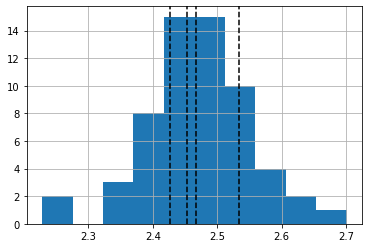

In [78]:
df["density"].hist()
xposition = [density_mean_1, density_mean_2, density_mean_3, density_mean_4]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')

In [53]:
mean_density = df[df["color"]!=4]["density"].mean()
mean_density

2.448711111111111

In [54]:
sigma = float(df[df["color"]!=4]["density"].std(ddof=0))
sigma

0.07771303972442382

1-Голубой
2-Желтый
3-Зеленый
4-Черный

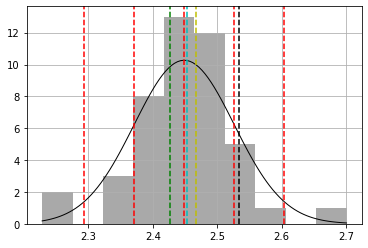

In [86]:
df[df["color"]!=4]["density"].hist(color='darkgrey')
xposition = [density_mean_1, density_mean_2, density_mean_3, density_mean_4]
rv = norm(mean_density,sigma)
x = np.linspace(df[df["color"]!=4]['density'].min(),df[df["color"]!=4]['density'].max(), 100)
plt.plot(x, 2*rv.pdf(x), 'k', lw=1, label='Gauss')
plt.axvline(x=density_mean_1, color='c', linestyle='--')
plt.axvline(x=density_mean_2, color='y', linestyle='--')
plt.axvline(x=density_mean_3, color='g', linestyle='--')
plt.axvline(x=density_mean_4, color='k', linestyle='--')
xposition = [mean_density - 2*sigma, mean_density - sigma, mean_density, mean_density + sigma, mean_density + 2*sigma]
for xc in xposition:
    plt.axvline(x=xc, color='r', linestyle='--')
plt.show()

## 